In [191]:
#importing the necessary modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras import initializers

In [192]:
#loading data
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

Training data:


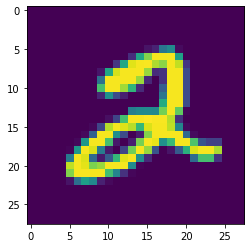

Label of this image is 2


In [193]:
import matplotlib.pyplot as plt
print("Training data:")
plt.imshow(xtrain[5])
plt.show()
print("Label of this image is",ytrain[5])

In [194]:
#reshaping data as needed by the model
xtrain=np.reshape(xtrain,(-1,28,28,1))
xtest=np.reshape(xtest,(-1,28,28,1))
xtrain1=xtrain[0:50000,:,:,:]
xval=xtrain[50000:,:,:,:]
ytrain1=ytrain[0:50000]
yval=ytrain[50000:]
xtrain1.shape,xtest.shape,ytrain1.shape,ytest.shape

((50000, 28, 28, 1), (10000, 28, 28, 1), (50000,), (10000,))

In [195]:
#normalising
xtrain1=xtrain1/255
xval=xval/255
xtest=xtest/255

In [196]:
#implementing one hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(ytrain1, num_classes=10)
y_val=to_categorical(yval, num_classes=10)
y_test = to_categorical(ytest, num_classes=10)

In [210]:
#importing the model
from tensorflow.keras.models import Sequential

In [211]:
#creating model object
model=Sequential()

In [212]:
#importing layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [213]:
#adding layers and forming the model
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu",kernel_initializer=initializers.RandomNormal(stddev=0.01),bias_initializer=initializers.Zeros()))
model.add(Dropout(0.2))
model.add(Dense(10,activation="sigmoid",kernel_initializer=initializers.RandomNormal(stddev=0.01),bias_initializer=initializers.Zeros()))

In [214]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        1600      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 1024)              3212288   
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)             

In [202]:
#opt = keras.optimizers.Adam(learning_rate=0.001)

In [215]:
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [216]:
#training the model
checkpoint_filepath = './tmp/checkpoint/weights'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    mode='min')
history=model.fit(xtrain1,y_train,batch_size=150,epochs=5,validation_data=(xval,y_val),callbacks=[model_checkpoint_callback])

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 116s 2ms/sample - loss: 0.2633 - accuracy: 0.9211 - val_loss: 0.0796 - val_accuracy: 0.9766
Epoch 2/5
50000/50000 [==============================] - 140s 3ms/sample - loss: 0.0685 - accuracy: 0.9790 - val_loss: 0.0528 - val_accuracy: 0.9834
Epoch 3/5
50000/50000 [==============================] - 130s 3ms/sample - loss: 0.0430 - accuracy: 0.9868 - val_loss: 0.0401 - val_accuracy: 0.9876
Epoch 4/5
50000/50000 [==============================] - 124s 2ms/sample - loss: 0.0350 - accuracy: 0.9885 - val_loss: 0.0399 - val_accuracy: 0.9886
Epoch 5/5
50000/50000 [==============================] - 119s 2ms/sample - loss: 0.0264 - accuracy: 0.9916 - val_loss: 0.0384 - val_accuracy: 0.9892


In [217]:
prediction=model.predict(xtest)

matrix = confusion_matrix(y_test.argmax(axis=1), prediction.argmax(axis=1))

In [218]:
matrix

array([[ 971,    0,    0,    1,    0,    0,    3,    0,    3,    2],
       [   0, 1127,    1,    3,    0,    1,    1,    1,    1,    0],
       [   0,    0, 1029,    0,    0,    0,    0,    1,    2,    0],
       [   0,    0,    0, 1007,    0,    3,    0,    0,    0,    0],
       [   0,    1,    1,    0,  970,    0,    0,    0,    0,   10],
       [   0,    0,    0,    7,    0,  883,    1,    0,    1,    0],
       [   1,    2,    0,    0,    1,    6,  945,    0,    3,    0],
       [   0,    1,    7,    2,    0,    1,    0, 1007,    1,    9],
       [   0,    0,    1,    3,    0,    3,    0,    0,  962,    5],
       [   0,    0,    0,    3,    2,    4,    0,    0,    0, 1000]],
      dtype=int64)

In [219]:
score=model.evaluate(xtrain1,y_train)
score1=model.evaluate(xtest,y_test)

10000/10000 [==============================] - 8s 798us/sample - loss: 0.0319 - accuracy: 0.9901


In [220]:
#model train and test scores

print('Test loss:', score1[0])
print('Test accuracy:', score1[1]*100)
print('Test error rate:',(1-score1[1])*100)
print('Train loss:', score[0])
print('Train accuracy:', score[1]*100)
print('Train error rate:',(1-score[1])*100)

Test loss: 0.03186189399957657
Test accuracy: 99.01000261306763
Test error rate: 0.989997386932373
Train loss: 0.020531072150440886
Train accuracy: 99.33800101280212
Train error rate: 0.661998987197876


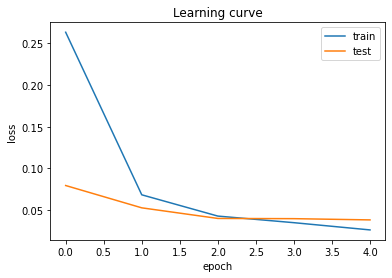

In [221]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Learning curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()